<a href="https://colab.research.google.com/github/michaelwise12/hbc-wise/blob/main/Music_Classification_ML_Wise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Michael Wise
#### **Final Project - Music Classification - On The Classification of Sound Waves**
#### DATA 440L Machine Learning

Classification of music is widely used in many software applications such as Spotify and Apple Music where it is applied to song recommender systems. Here, we classify songs based on genre from the GTZAN dataset using an assortment of models. We also detail our methods on data collection and prepossessing while giving an overview of the data. Various machinelearning methods were considered like the XGBoost, Artificial Neural Network, and K-Nearest Neighbors algorithms for classification. We evaluate their performance while introducing the state-of-the-art techniques for these type of problems. In addition, we analyze the feature extraction of sound waves while giving an in-depth explanation on some of these features and future improvements.

---

Below is the code implementation:



In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

## Importing the data

We have unzip the file. Each song is a `.wav` file, seperated by genre in each folder.

In [ ]:
!curl -O http://opihi.cs.uvic.ca/sound/genres.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1168M  100 1168M    0     0   977k      0  0:20:24  0:20:24 --:--:--  992k


In [ ]:
!tar xvzf genres.tar.gz

genres/
genres/bextract_single.mf
genres/bl.mf
genres/blues/
genres/cl.mf
genres/classical/
genres/co.mf
genres/country/
genres/di.mf
genres/disco/
genres/hi.mf
genres/hiphop/
genres/input.mf
genres/ja.mf
genres/jazz/
genres/me.mf
genres/metal/
genres/po.mf
genres/pop/
genres/re.mf
genres/reggae/
genres/ro.mf
genres/rock/
genres/rock/rock.00000.wav
genres/rock/rock.00001.wav
genres/rock/rock.00002.wav
genres/rock/rock.00003.wav
genres/rock/rock.00004.wav
genres/rock/rock.00005.wav
genres/rock/rock.00006.wav
genres/rock/rock.00007.wav
genres/rock/rock.00008.wav
genres/rock/rock.00009.wav
genres/rock/rock.00010.wav
genres/rock/rock.00011.wav
genres/rock/rock.00012.wav
genres/rock/rock.00013.wav
genres/rock/rock.00014.wav
genres/rock/rock.00015.wav
genres/rock/rock.00016.wav
genres/rock/rock.00017.wav
genres/rock/rock.00018.wav
genres/rock/rock.00019.wav
genres/rock/rock.00020.wav
genres/rock/rock.00021.wav
genres/rock/rock.00022.wav
genres/rock/rock.00023.wav
genres/rock/rock.00024.wav
g

## Import kaggle datasets

In [ ]:
# Initiate CSV as pandas DF
df3 = pd.read_csv("/content/features_3_sec.csv")
df3.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
df3.shape

(9990, 60)

In [ ]:
df30 = pd.read_csv("/content/features_30_sec.csv")
df30.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
import os
print(list(os.listdir('/content/genres/')))

['.ipynb_checkpoints', 'metal', 'reggae', 'disco', 'hiphop', 'jazz', 'rock', 'blues', 'country', 'pop', 'classical']


In [ ]:
# Importing 1 file
y, sr = librosa.load('/content/genres/metal/metal.00001.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y: [0.1164856  0.1194458  0.12341309 ... 0.01867676 0.06533813 0.034729  ] 

y shape: (661504,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

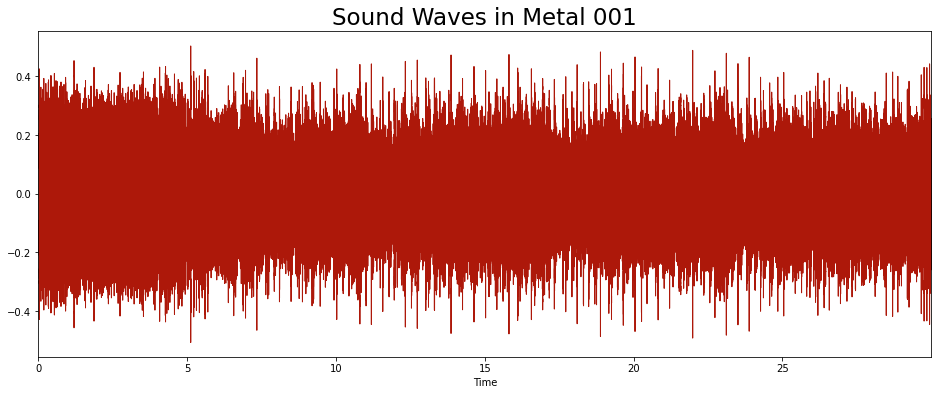

In [ ]:
audio_file, _ = librosa.effects.trim(y)
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#ad180a");
plt.title("Sound Waves in Metal 001", fontsize = 23);

Shape of D object: (1025, 1293)


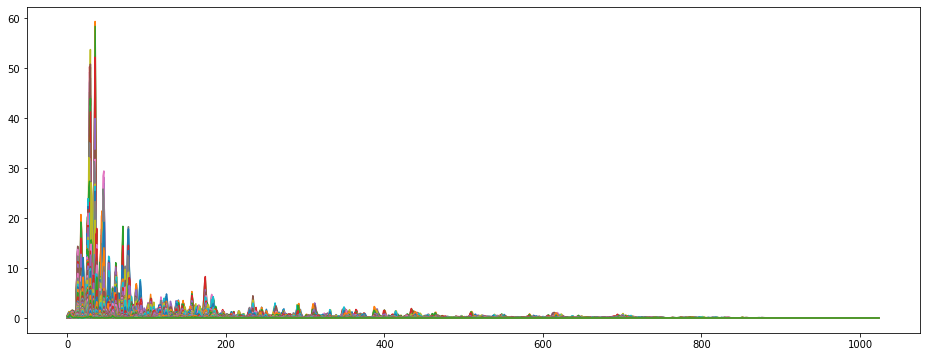

In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))
plt.figure(figsize = (16, 6))
plt.plot(D);

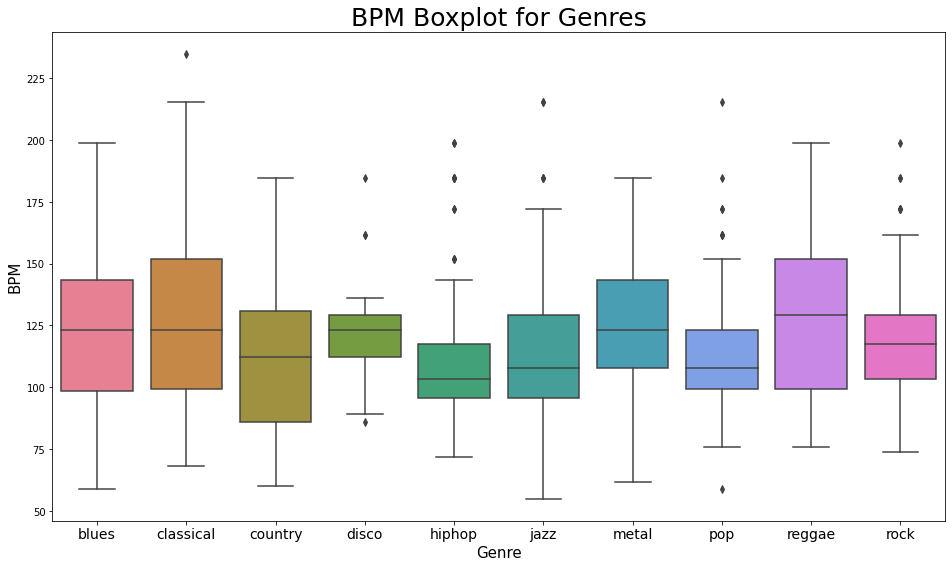

In [ ]:
x = df30[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

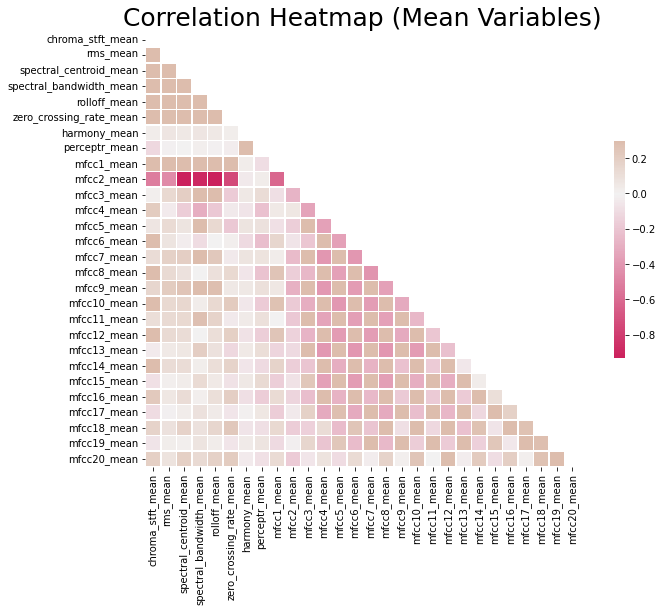

In [ ]:
# Computing the Correlation Matrix
spike_cols = [col for col in df3.columns if 'mean' in col]
corr = df3[spike_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))


f, ax = plt.subplots(figsize=(12,8));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (Mean Variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

## Preprocessing the data

In [ ]:
from sklearn import preprocessing
df30 = df30.iloc[0:, 1:]
y = df30['label']
X = df30.loc[:, df30.columns != 'label']

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

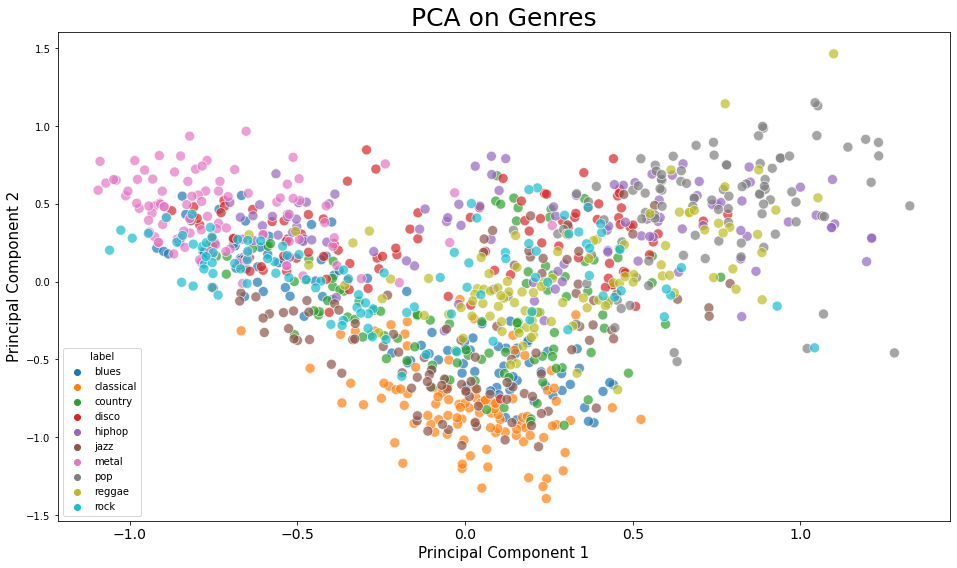

In [ ]:
#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

## Normalize the 3 second data (replaces X and y)

In [ ]:
from sklearn import preprocessing
df3 = df3.iloc[0:, 1:]
y = df3['label']
X = df3.loc[:, df3.columns != 'label']

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

In [ ]:
#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

## Running models on the data to predict music genre

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score 
from sklearn.metrics import confusion_matrix,roc_curve, auc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import time

In [ ]:
# 70-30 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### XGBoost Model

In [ ]:
xgb = XGBClassifier(learning_rate=0.05, 
                    n_estimators=1000)

In [ ]:
# Defining the parameter grid for XGBoost
xgb_params = {
              'min_child_weight': [1, 5, 10],
              'gamma': [0.5, 1, 1.5, 2, 5],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.6, 0.8, 1.0],
              'max_depth': [3, 4, 5]
             }

In [ ]:
def searchCV (clf, params, search_type ='random', folds=5, param_comb = 20):
     
  if search_type =='random':
    search_ = RandomizedSearchCV(estimator = clf, 
                                 param_distributions=params, 
                                 n_iter=param_comb, 
                                 scoring='roc_auc', 
                                 n_jobs=-1, 
                                 cv=folds, 
                                 verbose=3, 
                                 random_state=42)
  elif search_type =='grid':
    search_ = GridSearchCV(estimator=clf,
                                param_grid=params,
                                scoring='roc_auc',
                                n_jobs=-1,
                                cv=5,
                                verbose=3) 
  return search_

In [ ]:
def eval_model (srchCV, X_test, y_test):
  #get predictions on the test set
  predictions = srchCV.predict(X_test)

  # get probabilities for positive class
  probs = srchCV.predict_proba(X_test)[:,1]

  # Report the predictive performance metrics
  # evaluate predictions
  accuracy = accuracy_score(y_test, predictions)
  #roc = roc_auc_score(y_test, probs)

  print("\n")
  print(f"Accuracy.........: {accuracy * 100.0:.4f}")
  #print(f"ROC AUC (probs)..: {roc:.6f}\n\n")

  # Display confusion matrix 
  cm = confusion_matrix(y_test, predictions)
  print(cm)

In [ ]:
start_time = time.time()

xgb_srchCV = searchCV (clf=xgb, params=xgb_params, search_type ='random', folds=5, param_comb = 10)
xgb_srchCV.fit(X_train, y_train)

print(f"Execution time:{(time.time() - start_time):.2f} sec ---")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Execution time:7026.55 sec ---


In [ ]:
print(f'best score.....:{xgb_srchCV.best_score_}')
print(f'best parameters:{xgb_srchCV.best_params_}')

best score.....:nan
best parameters:{'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 0.6}


## Neural network

In [ ]:
# One hot encode the y data to run through the neural network
y_train2 = pd.get_dummies(y_train)
y_test2 = pd.get_dummies(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu')) # Hidden 1
model.add(Dense(128, activation='relu')) # Hidden 2
model.add(Dense(64, activation='relu')) # Hidden 3
model.add(Dense(32, activation='relu')) # Hidden 4
model.add(Dense(y_train2.shape[1],activation='softmax')) # Output: 10 different genres

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               15104     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 58,666
Trainable params: 58,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,verbose=2,epochs=100)

Epoch 1/100
219/219 - 1s - loss: 1.7126 - 979ms/epoch - 4ms/step
Epoch 2/100
219/219 - 0s - loss: 1.2968 - 397ms/epoch - 2ms/step
Epoch 3/100
219/219 - 0s - loss: 1.1894 - 390ms/epoch - 2ms/step
Epoch 4/100
219/219 - 0s - loss: 1.1103 - 367ms/epoch - 2ms/step
Epoch 5/100
219/219 - 0s - loss: 1.0327 - 380ms/epoch - 2ms/step
Epoch 6/100
219/219 - 0s - loss: 0.9557 - 380ms/epoch - 2ms/step
Epoch 7/100
219/219 - 0s - loss: 0.9110 - 387ms/epoch - 2ms/step
Epoch 8/100
219/219 - 0s - loss: 0.8757 - 374ms/epoch - 2ms/step
Epoch 9/100
219/219 - 0s - loss: 0.8295 - 375ms/epoch - 2ms/step
Epoch 10/100
219/219 - 0s - loss: 0.8121 - 377ms/epoch - 2ms/step
Epoch 11/100
219/219 - 0s - loss: 0.7807 - 383ms/epoch - 2ms/step
Epoch 12/100
219/219 - 0s - loss: 0.7692 - 375ms/epoch - 2ms/step
Epoch 13/100
219/219 - 0s - loss: 0.7436 - 374ms/epoch - 2ms/step
Epoch 14/100
219/219 - 0s - loss: 0.7123 - 374ms/epoch - 2ms/step
Epoch 15/100
219/219 - 0s - loss: 0.7018 - 374ms/epoch - 2ms/step
Epoch 16/100
219/21

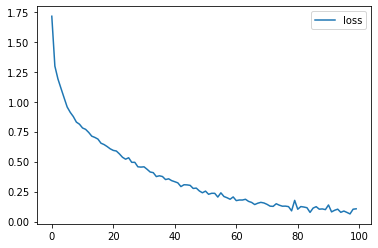

In [ ]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
pred = model.predict(X_test)
print(f"Shape: {pred.shape}")
print(pred[0:10])

Shape: (2997, 10)
[[3.88639535e-07 9.32221830e-17 2.33729315e-05 2.39300352e-04
  6.79976165e-01 9.33626065e-09 8.02767417e-08 9.36968434e-07
  3.19734991e-01 2.47677144e-05]
 [2.03483125e-07 2.14843615e-10 2.74165419e-08 5.28633526e-10
  3.55636134e-14 9.99999642e-01 6.66801681e-09 8.63081525e-13
  6.43706442e-13 6.86122235e-08]
 [9.23455596e-01 1.01145080e-12 1.69267544e-09 4.86193178e-03
  1.74503000e-07 2.88100291e-05 7.16502294e-02 2.89767261e-13
  6.76148417e-08 3.13640680e-06]
 [9.77779150e-01 3.61954910e-11 2.39902246e-03 2.20056208e-05
  1.20721626e-04 2.61918904e-04 4.44050995e-04 1.81339161e-07
  1.21173682e-02 6.85562612e-03]
 [1.71147019e-06 6.01203798e-09 2.71308835e-07 5.75629510e-02
  2.82975356e-03 8.53499840e-11 9.33720350e-01 7.04917170e-07
  8.06885830e-04 5.07740397e-03]
 [1.15527691e-13 9.67248610e-08 2.62285312e-07 4.21879377e-05
  2.06506010e-11 6.82126665e-06 2.49255716e-12 1.27689564e-03
  2.26483254e-09 9.98673797e-01]
 [1.68287422e-28 6.51083887e-23 2.652355

In [ ]:
# We reverse one-hot encoding on y_test to compare with predictions
reverse_y_test = np.argmax(np.array(y_test2), axis=1)
reverse_pred = np.argmax(pred,axis=1)

In [ ]:
reverse_y_test

array([4, 5, 0, ..., 6, 3, 0])

In [ ]:
reverse_pred

array([4, 5, 0, ..., 6, 3, 0])

## K - Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
# Defining the parameter grid for KNN
knn_params = {
              'n_neighbors': [3, 5, 11, 19],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']
             }

In [ ]:
start_time = time.time()

knn_srchCV = searchCV(clf=knn, params=knn_params, search_type ='random', folds=5, param_comb = 20)
knn_srchCV.fit(X_train, y_train)

print(f"Execution time:{(time.time() - start_time):.2f} sec ---")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Execution time:17.63 sec ---


In [ ]:
print(f'best score.....:{knn_srchCV.best_score_}')
print(f'best parameters:{knn_srchCV.best_params_}')

best score.....:0.9875849713842841
best parameters:{'weights': 'distance', 'n_neighbors': 11, 'metric': 'manhattan'}


## Model evaluations

Note that `reverse_y_test` is just a numpy array of the indices each original genre was.

In [ ]:
# Evaluate predictions for Neural Network
accuracy = accuracy_score(reverse_y_test, reverse_pred)
print(f"Accuracy.........: {accuracy * 100.0:.4f}")

cm = confusion_matrix(reverse_y_test, reverse_pred)
print(cm)

Accuracy.........: 85.5522
[[239   0  16  17   4  17  13   0   8   5]
 [  0 284   0   1   0  21   0   1   0   1]
 [  6   0 231   9   0  20   3   2   6   9]
 [  0   2   4 270   4   5   4   3   1   8]
 [  1   1   2  17 257   2   6  13  12   0]
 [  0   9   5   0   0 269   0   0   2   1]
 [  2   0   1   5   3   1 291   0   0   0]
 [  1   0   5   4   1   0   0 248   6   2]
 [  0   1   8   8   7   1   2   5 280   4]
 [  1   6  21  27   1   6  31   4   8 195]]


In [ ]:
# Evaluate predictions for XGBoost
eval_model(xgb_srchCV, X_test, y_test)



Accuracy.........: 88.4218
[[271   0  16   9   1   7   4   0   6   5]
 [  0 297   0   0   0   9   0   0   0   2]
 [ 12   1 241   6   0  11   0   4   6   5]
 [  2   3   5 254   6   3   2  19   3   4]
 [  2   1   5   7 279   2   2   4   6   3]
 [  5  10   6   1   0 262   0   1   0   1]
 [  6   0   2   2   4   0 282   0   1   6]
 [  0   0   4   3   3   0   0 250   4   3]
 [  4   2   7   7   7   1   1   8 274   5]
 [  9   1  13  14   2   6   9   2   4 240]]


In [ ]:
# Evaluate predictions for KNN
knn_pred = knn_srchCV.predict(X_test)
knn_pred2 = np.argmax(knn_pred,axis=1)
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
accuracy = accuracy_score(reverse_y_test, knn_pred2)

cm = confusion_matrix(reverse_y_test,  knn_pred2)
print(cm)

Accuracy.........: 82.6493
[[297   1  11   3   0   4   0   0   2   1]
 [  6 296   1   0   0   5   0   0   0   0]
 [ 63   1 208   2   0   3   0   0   6   3]
 [ 37   4   3 253   0   0   0   0   1   3]
 [ 40   2   4   2 254   0   0   4   4   1]
 [ 23  24   2   1   0 236   0   0   0   0]
 [ 18   0   0   1   0   0 275   0   4   5]
 [ 29   0   1   4   1   1   0 229   1   1]
 [ 38   1   5   4   2   0   0   3 263   0]
 [ 55   0   2  18   0   2   5   0   4 214]]
